# Employee Exit Survey

## The Client
TAFE and DETE are vocational colleges in Australia. They have been doing exit surveys for a while and have now gathered a dataset of about 1600 results which they would like analysed. The client is focussed on internal contributing factors.

## Aims of Analysis: Dissatisfaction
The client has asked for a report to help them understand the results of their recent exit survey.

They wish to understand the profile of employees who cite dissatisfaction as a contributing factor to their exit from the organisation.

Leadership wants to understand where to target retention improvement strategies.

## Conclusions

### Correlations Found with Dissatisfied Leavers
- Conflict in departments has a fairly strong correlation across the datasets.
- Age has a strong correlation at TAFE and a weaker correlation at DETE, but enough to explore more.
- Gender has a meaningful correlation across both colleges.

### Further Investigations
- Conflict: Can this be linked to gender or age? We know there is no correlation to other contributory factors, but it seems plausible that age or gender could be the cause of conflict.


## Notebooks and Reports
The following notebooks and documents are part of this anaylsis:

### Jupyter Notebook Filename: Summary
- [employee_exit_survey_cleaning_1.csv](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_1.ipynb): Columns drops, missing data, renaming columns, tidying data for consistency
- [employee_exit_survey_cleaning_2.csv](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_2.ipynb): Adding calculated columns, adding category columns, further drops
- [employee_exit_survey_correlation.csv](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_correlation.ipynb): Investigating correlations to guide analysis
- [employee_exit_survey_gender.csv](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_gender.ipynb): Aggregation by pivot_table of gender subsets, visualisations
- [employee_exit_survey_age.csv](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_age.ipynb): Aggregation by pivot_table of gender subsets, visualisations
- [employee_exit_survey_conflict.csv](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_conflict.ipynb):  Aggregation by pivot_table of gender subsets, visualisations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [3]:
#exit_survey.to_csv('exit_survey_2017.csv')
exit_survey = pd.read_csv('employee_exit_survey_clean_final.csv')

In [4]:
exit_survey.corr(method='pearson')

,Unnamed: 0,index,cf_to_private_sector,cf_health,cf_family,cf_dept_dissatisfaction,cf_job_dissatisfaction,cf_interpersonal_conflict,cf_other,institute_recognition,institute_job_security,dept_workload,dept_work_life_balance,dept_work_environment,exit_year,cf_dept_or_job_dissatisfaction
Unnamed: 0,1.000000,1.000000,-0.059761,0.159205,0.071500,-0.051166,-0.048530,-0.006882,0.097038,-0.073342,-0.150416,-0.103197,0.081554,-0.287864,0.814613,-0.056814
index,1.000000,1.000000,-0.059761,0.159205,0.071500,-0.051166,-0.048530,-0.006882,0.097038,-0.073342,-0.150416,-0.103197,0.081554,-0.287864,0.814613,-0.056814
cf_to_private_sector,-0.059761,-0.059761,1.000000,-0.105713,-0.030012,0.014065,0.066957,0.007815,-0.120904,0.024903,0.025662,0.022970,-0.040754,0.072119,-0.043086,0.046568
cf_health,0.159205,0.159205,-0.105713,1.000000,-0.023230,0.030921,0.000695,0.013150,-0.141528,-0.036189,-0.033907,-0.040208,-0.022595,-0.009234,0.126138,0.023904
cf_family,0.071500,0.071500,-0.030012,-0.023230,1.000000,-0.013571,-0.032373,0.006855,-0.093963,-0.025735,-0.028121,-0.043384,0.035355,-0.047402,0.041493,-0.030192
cf_dept_dissatisfaction,-0.051166,-0.051166,0.014065,0.030921,-0.013571,1.000000,0.290847,0.265444,-0.121508,0.059994,-0.032208,-0.016983,-0.043867,-0.029966,-0.052225,0.695678
cf_job_dissatisfaction,-0.048530,-0.048530,0.066957,0.000695,-0.032373,0.290847,1.000000,0.154247,-0.134933,0.095660,-0.036092,-0.003482,-0.029783,-0.056739,-0.039030,0.806694
cf_interpersonal_conflict,-0.006882,-0.006882,0.007815,0.013150,0.006855,0.265444,0.154247,1.000000,-0.081322,0.032920,0.005031,-0.031572,-0.018393,-0.043921,-0.039908,0.232604
cf_other,0.097038,0.097038,-0.120904,-0.141528,-0.093963,-0.121508,-0.134933,-0.081322,1.000000,-0.055930,-0.032663,-0.123622,-0.185102,-0.001794,0.061978,-0.171958
institute_recognition,-0.073342,-0.073342,0.024903,-0.036189,-0.025735,0.059994,0.095660,0.032920,-0.055930,1.000000,0.399842,0.257985,0.188996,0.292634,-0.068798,0.117308


In [5]:
exit_survey['cf_dept_dissatisfaction'].corr(exit_survey['cf_interpersonal_conflict'], method='pearson')

0.26544364072618015

## Correlation to **cf_dept_dissatisfaction** or **cf_job_dissatisfaction**
The DataFrame.corr() function ignores our primary targets of **age** and **gender** but there is one interesting correlation to explore:

- 'cf_dept_dissatisfaction' and 'cf_interpersonal_conflict'

0.265 is signficant enough in a binary correlation to explore in more detail.

In [44]:
exit_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   index                      1524 non-null   int64 
 1   cf_to_private_sector       1524 non-null   bool  
 2   cf_health                  1524 non-null   bool  
 3   cf_family                  1524 non-null   bool  
 4   cf_dept_dissatisfaction    1524 non-null   bool  
 5   cf_job_dissatisfaction     1524 non-null   bool  
 6   cf_interpersonal_conflict  1524 non-null   bool  
 7   cf_other                   1524 non-null   bool  
 8   institute_recognition      1524 non-null   bool  
 9   institute_job_security     1524 non-null   bool  
 10  dept_workload              1524 non-null   bool  
 11  dept_work_life_balance     1524 non-null   bool  
 12  dept_work_environment      1524 non-null   bool  
 13  gender                     1524 non-null   object
 14  age     

## Age Correlations
Because the data is categorical and the contributing factor columns and boolean, correlation is hard to achieve short of getting into Scipy and using more complex correlations such as DICE. However, since it's only one column, we can use exploratory visualisations to see whether we should look deeper.

<AxesSubplot:title={'center':'Dept Dissatisfaction as a CF by Age'}, xlabel='age'>

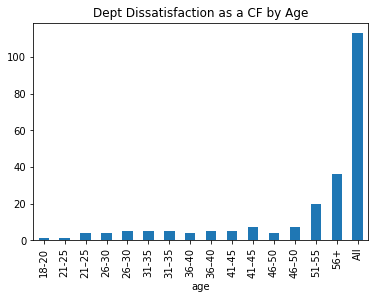

In [5]:
pv_age = exit_survey.pivot_table(values='cf_dept_dissatisfaction', index='age', aggfunc=np.sum, margins=True)
pv_age.plot(kind='bar', xlim=((0,10)), title='Dept Dissatisfaction as a CF by Age', legend=False)

<AxesSubplot:title={'center':'Job Dissatisfaction as a CF by Age'}, xlabel='age'>

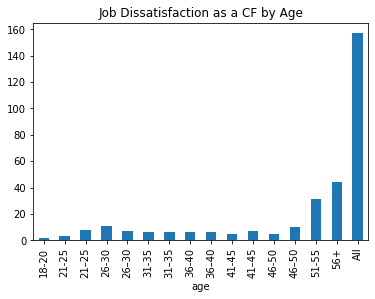

In [6]:
pv_age = exit_survey.pivot_table(values='cf_job_dissatisfaction', index='age', aggfunc=np.sum, margins=True)
pv_age.plot(kind='bar', xlim=((0,10)), title='Job Dissatisfaction as a CF by Age', legend=False)

In [89]:
# Since cf_job and cf_dept are broadly the same, we can combine these into one dataframe by OR 

#exit_survey['cf_dept_or_job_dissatisfaction'] = dissatisfied = exit_survey['cf_dept_dissatisfaction'] | exit_survey['cf_job_dissatisfaction']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   index                                   1524 non-null   int64 
 1   cf_to_private_sector                    1524 non-null   bool  
 2   cf_health                               1524 non-null   bool  
 3   cf_family                               1524 non-null   bool  
 4   cf_dept_dissatisfaction                 1524 non-null   bool  
 5   cf_job_dissatisfaction                  1524 non-null   bool  
 6   cf_interpersonal_conflict               1524 non-null   bool  
 7   cf_other                                1524 non-null   bool  
 8   institute_recognition                   1524 non-null   bool  
 9   institute_job_security                  1524 non-null   bool  
 10  dept_workload                           1524 non-null   bool  
 11  dept

In [94]:
#exit_survey.drop('cf_dept_or_job_cf_dept_dissatisfaction', axis=1, inplace=True)

<AxesSubplot:title={'center':'Dept and Job Dissatisfaction as a CF by Age'}, xlabel='age'>

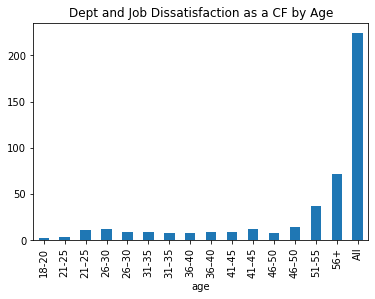

In [24]:
pv_age = exit_survey.pivot_table(values='cf_dept_or_job_dissatisfaction', index='age', aggfunc=np.sum, margins=True)
pv_age.plot(kind='bar', xlim=((0,10)), title='Dept and Job Dissatisfaction as a CF by Age', legend=False)

In [26]:
pv_age

,cf_dept_or_job_dissatisfaction
age,
18-20,2
21-25,4
21–25,11
26-30,12
26–30,9
31-35,9
31–35,8
36-40,8
36–40,9


### Possible Correlation
There might be a correlation here as there is a large jump in employees over 55 citing dissatisfaction as a contributing factor.

- 51-55 308% more likely to cite dissatisfaction that the next highest age group in the baseline.
- 56+ 600% more likely to cite dissatisfaction that the next highest age group in the baseline.

However, we need to see what the age distribution is for all employees.

<AxesSubplot:title={'center':'TAFE Age Distribution'}>

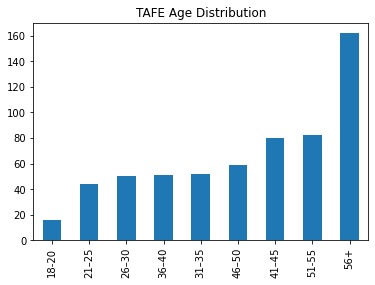

In [27]:
values = exit_survey.loc[exit_survey['college'] == 'TAFE','age']
values.value_counts().sort_values(ascending=True).plot(kind='bar', title='TAFE Age Distribution')

### Strong Correlation Found: Age at TAFE
- 51-55 about 130% more common in the TAFE data set, but produce a 308% of dissatisfied leavers.
- 56+ about 200% more common in the TAFE data set, but produce 600% of dissatisfied leavers.

<AxesSubplot:title={'center':'DETE Gender Distribution'}>

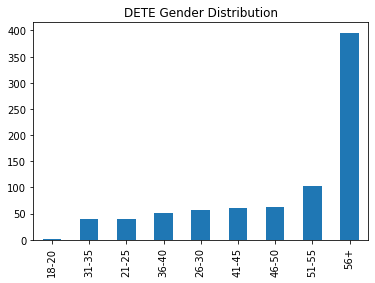

In [23]:
values = exit_survey.loc[exit_survey['college'] == 'DETE','age']
values.value_counts().sort_values(ascending=True).plot(kind='bar', title='DETE Age Distribution')

### Weaker Correlation Found: Age at DETE
- 51-55 about 150% more common in the DETE dataset, but produce 308% of dissatisfied leavers.
- 56+ about 400% more common in the DETE dataset, but produce 600% of dissatisfied leavers.

### Conlcusion
The correlation between age and dissatisfied leavers is strong at TAFE than it is at DETE, where there is a larger number of employees over the age of 65, but there is clearly a surge in dissatisfaction in the this age group that should be explore more.


## Gender Correlations

Because the data is categorical and the contributing factor columns and boolean, correlation is hard to achieve short of getting into Scipy and using more complex correlations such as DICE. However, since it's only one column, we can use exploratory visualisations to see whether we should look deeper.

        cf_dept_or_job_dissatisfaction
gender                                
Female                             149
Male                                92
All                                241


<AxesSubplot:title={'center':'Dept Dissatisfaction as a CF by Gender'}, xlabel='gender'>

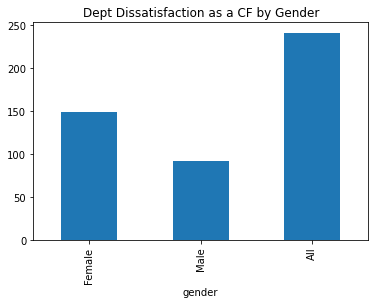

In [28]:
pv_gender = exit_survey.pivot_table(values='cf_dept_or_job_dissatisfaction', index='gender', aggfunc=np.sum, margins=True)
pv_gender.plot(kind='bar', xlim=((0,10)), title='Dept Dissatisfaction as a CF by Gender', legend=False)

Initially, it looks like there is a greater number of dissatisfied women.

However, we need to see the gender distribution across the colleges.

Female    1045
Male       479
Name: gender, dtype: int64


<AxesSubplot:title={'center':'TAFE Age Distribution'}>

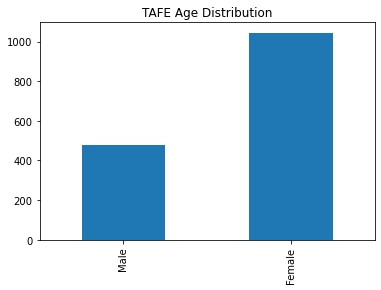

In [35]:
gender_values = exit_survey.loc[:,'gender']
gender_values.value_counts().sort_values(ascending=True).plot(kind='bar', title='TAFE Age Distribution')

In [41]:
print(gender_values.value_counts())
print('\n')
print(pv_gender)

Female    1045
Male       479
Name: gender, dtype: int64


        cf_dept_or_job_dissatisfaction
gender                                
Female                             149
Male                                92
All                                241


Some quick manual calculations reveal:

General Population:
- 68% Female
- 32% Male

Dissatisfied Population
- 62% Female
- 38% Male

### Correlation Found
There is a 6% difference between all leavers and dissatisfied leavers.


# Conclusions

## Correlations Found with Dissatisfied Leavers
- Conflict in departments has a fairly strong correlation across the datasets.
- Age has a strong correlation at TAFE and a weaker correlation at DETE, but enough to explore more.
- Gender has a meaningful correlation across both colleges.

## Further Investigations
- Conflict: Can this be linked to gender or age? We know there is no correlation to other contributory factors, but it seems plausible that age or gender could be the cause of conflict.